In [159]:
# importare tutte le librerie necessarie
import pandas as pd
import numpy as np
import datetime as dt
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# Cambio della cartella attuale nella cartella in cui si trova il file .py
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

path_cartella = r"\archive\csvs_per_year\csvs_per_year"

path = r".\\DataSet\\"
#path = path_file + path_cartella

c:\Users\chiar\OneDrive\Desktop\Progetto2DataScience\DataScience2Project


In [160]:
allMadrid = pd.read_csv(path+"out.csv")
#allMadrid = pd.read_csv(path+"\madrid_2008.csv")
allMadrid.head()

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2008-06-01 01:00:00,NaN,0.47,NaN,NaN,11.820078,83.089996,16.990000,16.889999,10.4,8.98,NaN,NaN,28079001
1,2008-06-01 01:00:00,NaN,0.59,NaN,NaN,11.820078,94.820000,17.469999,19.040001,NaN,5.85,NaN,NaN,28079003
2,2008-06-01 01:00:00,NaN,0.55,NaN,NaN,11.820078,75.919998,13.470000,20.270000,NaN,6.95,NaN,NaN,28079004
3,2008-06-01 01:00:00,NaN,0.36,NaN,NaN,11.820078,61.029999,23.110001,10.850000,NaN,5.96,NaN,NaN,28079039
4,2008-06-01 01:00:00,1.68,0.80,1.7,0.3,11.820078,105.199997,12.120000,37.160000,21.9,10.92,1.53,6.67,28079006


In [161]:
#allMadrid = allMadrid.drop(['date','BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'SO_2', 'TCH', 'TOL', 'PM25', 'station'], axis=1)
#allMadrid = allMadrid.drop(['date','BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'OXY', 'O_3', 'PXY', 'TCH', 'TOL', 'station'], axis=1)
allMadrid = allMadrid.drop(['BEN', 'CO', 'EBE', 'NMHC', 'O_3', 'TCH', 'TOL', 'station'], axis=1)
allMadrid['date'] = pd.to_datetime(allMadrid['date'], errors='coerce')
allMadrid = allMadrid[(allMadrid['date'].dt.year < 2017)]
print(allMadrid)
#allMadrid.head()


                       date         NO        NO_2       PM10  PM25   SO_2
0       2008-06-01 01:00:00  11.820078   83.089996  16.889999  10.4   8.98
1       2008-06-01 01:00:00  11.820078   94.820000  19.040001   NaN   5.85
2       2008-06-01 01:00:00  11.820078   75.919998  20.270000   NaN   6.95
3       2008-06-01 01:00:00  11.820078   61.029999  10.850000   NaN   5.96
4       2008-06-01 01:00:00  11.820078  105.199997  37.160000  21.9  10.92
...                     ...        ...         ...        ...   ...    ...
1911667 2016-07-01 00:00:00   2.000000   29.000000        NaN   NaN    NaN
1911668 2016-07-01 00:00:00   1.000000   29.000000  36.000000   NaN   5.00
1911669 2016-07-01 00:00:00   1.000000   19.000000        NaN   NaN    NaN
1911670 2016-07-01 00:00:00   6.000000   17.000000        NaN   NaN    NaN
1911671 2016-07-01 00:00:00   2.000000   46.000000  34.000000   NaN    NaN

[1911648 rows x 6 columns]


In [162]:
# Faccio un cambio di formato sul campo data passando da stringa a data
allMadrid['date'] = pd.to_datetime(allMadrid['date'], format='%Y/%m/%d %H:%M:%S')
#prendo la data solo in formato AAAA-MM-GG
allMadrid['date'] = pd.to_datetime(allMadrid['date'].dt.strftime('%Y-%m-%d'))
print(allMadrid['date'])

0         2008-06-01
1         2008-06-01
2         2008-06-01
3         2008-06-01
4         2008-06-01
             ...    
1911667   2016-07-01
1911668   2016-07-01
1911669   2016-07-01
1911670   2016-07-01
1911671   2016-07-01
Name: date, Length: 1911648, dtype: datetime64[ns]


In [163]:
#raggruppo per station
allMadrid = allMadrid.groupby(['date']).mean()
allMadrid = allMadrid.reset_index(drop=True)
print(allMadrid.columns)

Index(['NO', 'NO_2', 'PM10', 'PM25', 'SO_2'], dtype='object')


In [ ]:
allMadrid.head()

In [164]:
allMadrid = allMadrid.dropna(subset=['PM10'])
Livello = allMadrid['PM10']
#allMadrid = allMadrid.dropna()
allMadrid = allMadrid.drop(['PM10'], axis=1)
allMadrid.head()

,NO,NO_2,PM25,SO_2
0,11.820078,67.084565,25.650870,19.815357
1,11.820078,66.552372,15.767895,14.897970
2,11.820078,50.410930,5.617396,10.923919
3,11.820078,58.247292,13.236000,12.875144
4,11.820078,47.282292,12.485729,11.804503


In [ ]:
print(allMadrid)

In [165]:
#cerco i campi NaN in PM10 e li sostituisco con la media dei valori noti
#trovo il valor medio
for col in allMadrid.columns:
    if allMadrid[col].dtype != object:
        allMadrid[col]=allMadrid[col].fillna(allMadrid[col].mean())

allMadrid = allMadrid.astype(int)
#print(allMadrid['PM10'])

In [ ]:
allMadrid.head()

In [166]:
condition_list = [(Livello <= 20), (Livello > 20)]

choicelist = [0,1] 

Livello = np.select(condition_list, choicelist, default='Non Specificato')

Livello = Livello.astype(int)

print(Livello)

[1 1 0 ... 1 1 1]


In [167]:
allMadrid = pd.get_dummies(allMadrid)
allMadrid.head()

,NO,NO_2,PM25,SO_2
0,11,67,25,19
1,11,66,15,14
2,11,50,5,10
3,11,58,13,12
4,11,47,12,11


In [168]:
scaler = MinMaxScaler()
scaled_d = scaler.fit_transform(allMadrid[["NO", "NO_2", "PM25", "SO_2"]])
allMadrid[["NO", "NO_2", "PM25", "SO_2"]] = scaled_d
allMadrid.head()

,NO,NO_2,PM25,SO_2
0,0.041667,0.526316,0.403509,0.642857
1,0.041667,0.517544,0.228070,0.464286
2,0.041667,0.377193,0.052632,0.321429
3,0.041667,0.447368,0.192982,0.392857
4,0.041667,0.350877,0.175439,0.357143


CLASSIFICAZIONE

In [169]:
allMadrid.head()

,NO,NO_2,PM25,SO_2
0,0.041667,0.526316,0.403509,0.642857
1,0.041667,0.517544,0.228070,0.464286
2,0.041667,0.377193,0.052632,0.321429
3,0.041667,0.447368,0.192982,0.392857
4,0.041667,0.350877,0.175439,0.357143


BILANCIAMENTO DEL DATASET

In [170]:
#separazione da tollerabile a non_tollerabile
allMadrid['Livello'] = pd.Series(Livello)
non_tollerabile = allMadrid[allMadrid.Livello == 1]
tollerabile = allMadrid[allMadrid.Livello == 0]

print("Tollerabili: ", len(tollerabile), "Non tollerabili: ", len(non_tollerabile))

Tollerabili:  1673 Non tollerabili:  1615


In [171]:
#bilanciamento del dataset
balanced_d = pd.concat([non_tollerabile, tollerabile.sample(len(non_tollerabile))])
#balanced_d = pd.concat([tollerabile, non_tollerabile.sample(len(tollerabile))])
x = balanced_d.iloc[:,:-1]
y = balanced_d.iloc[:,-1:]
balanced_d.shape

(3230, 5)

In [172]:
allMadrid.head()
print(allMadrid.columns)

Index(['NO', 'NO_2', 'PM25', 'SO_2', 'Livello'], dtype='object')


ANALISI DELLE CORRELAZIONI

<Figure size 2160x1080 with 0 Axes>

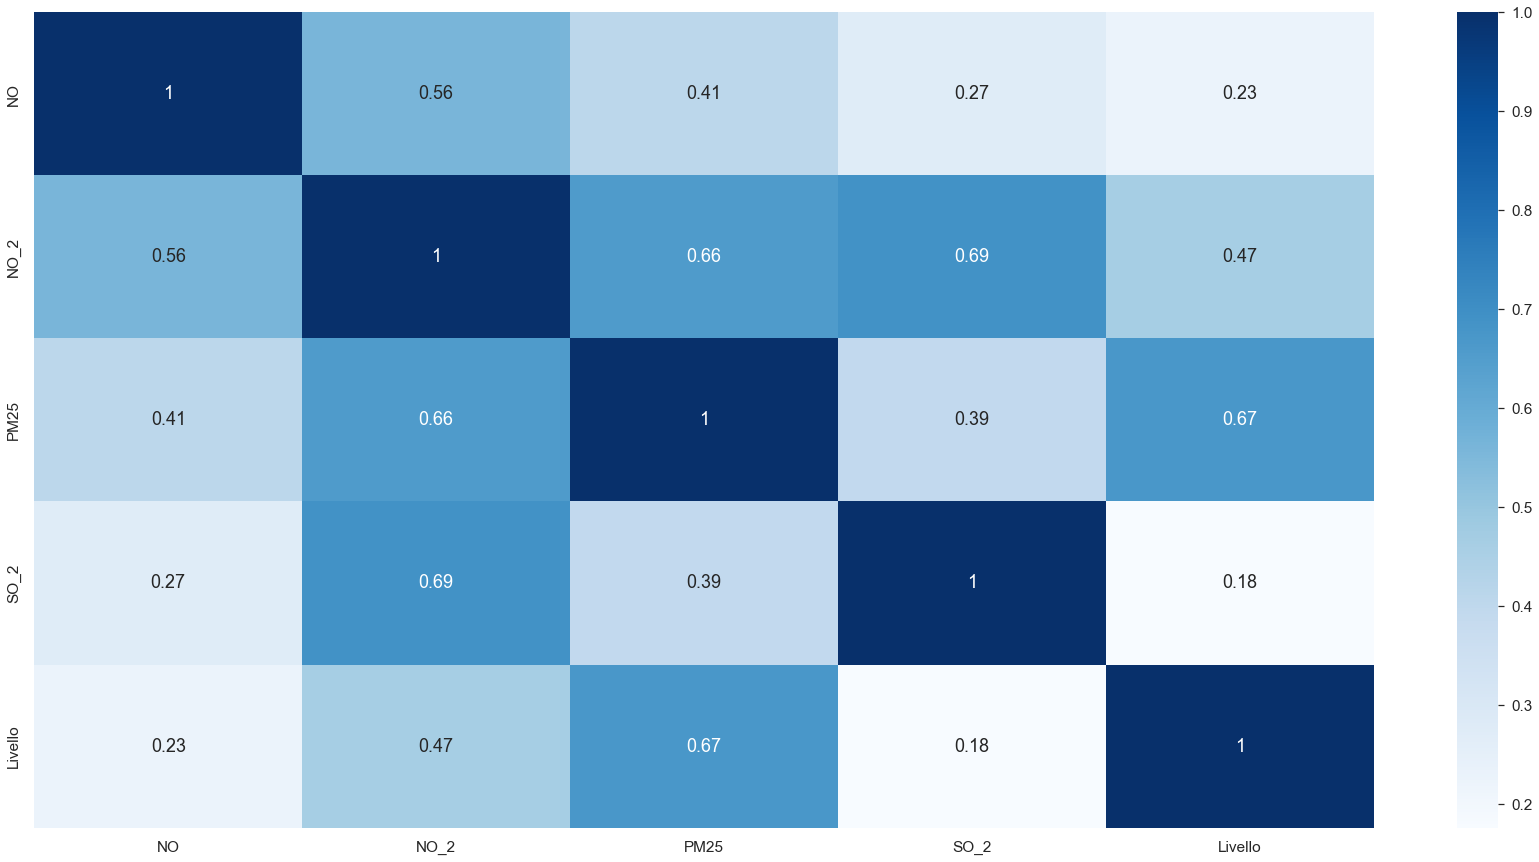

In [173]:
plt.figure(figsize=(30,15))

#x = x.drop(['BEN', 'CO', 'EBE', 'NMHC', 'O_3', 'TCH', 'TOL'], axis=1)

plt.figure(figsize=(30,15))
ax = sns.heatmap(allMadrid[allMadrid.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

<Figure size 2160x1080 with 0 Axes>

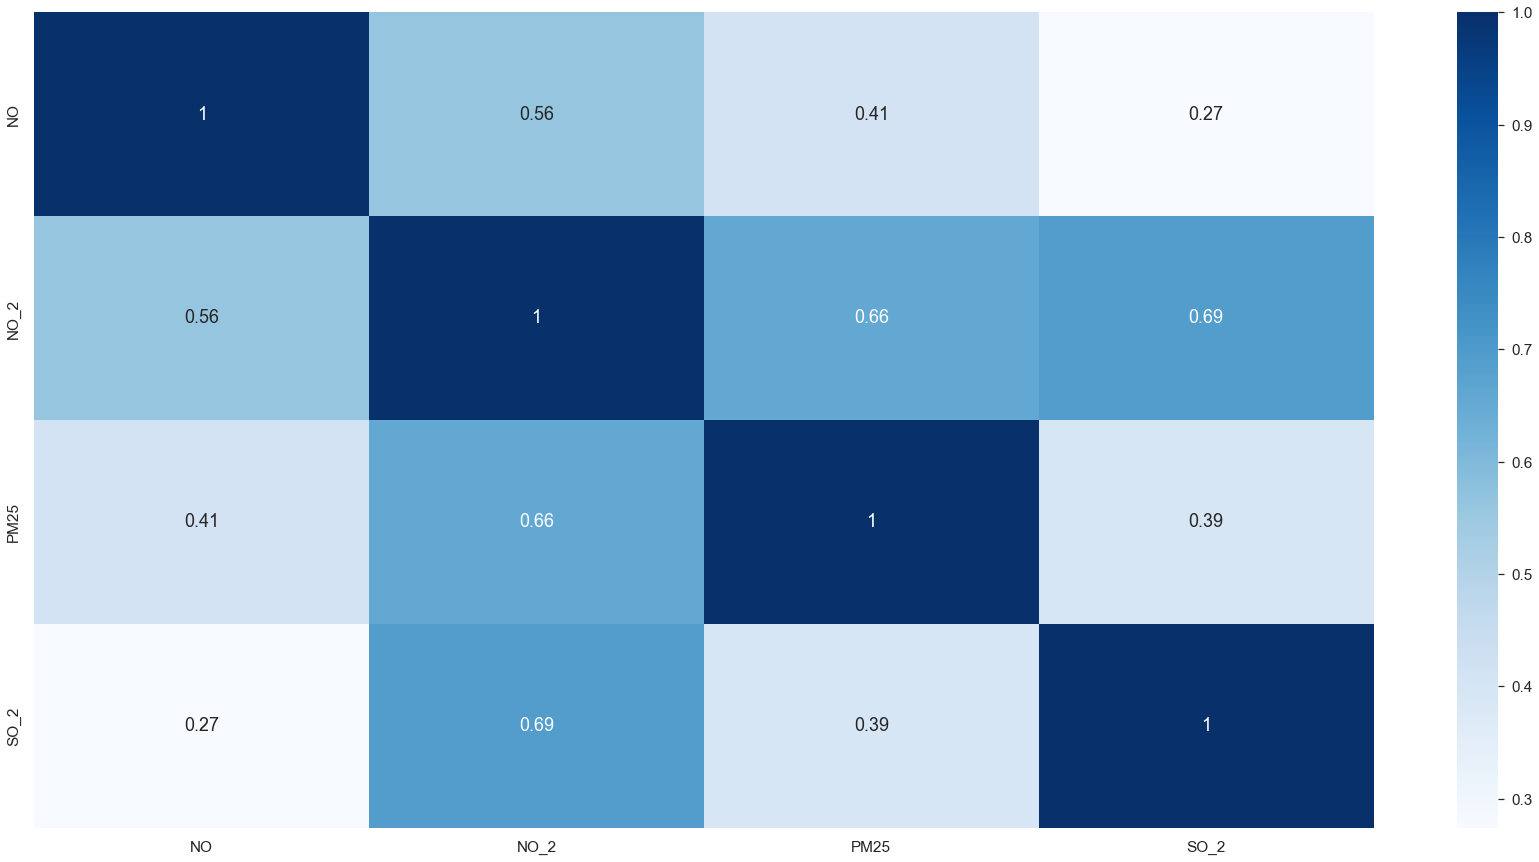

In [174]:
plt.figure(figsize=(30,15))

#x = x.drop(['BEN', 'CO', 'EBE', 'NMHC', 'O_3', 'TCH', 'TOL'], axis=1)

plt.figure(figsize=(30,15))
ax = sns.heatmap(x.corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [175]:
allMadrid.head()
allMadrid.info()
allMadrid.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NO       3288 non-null   float64
 1   NO_2     3288 non-null   float64
 2   PM25     3288 non-null   float64
 3   SO_2     3288 non-null   float64
 4   Livello  3288 non-null   int32  
dtypes: float64(4), int32(1)
memory usage: 115.7 KB


NO         3288
NO_2       3288
PM25       3288
SO_2       3288
Livello    3288
dtype: int64

CLASSIFICAZIONE BINARIA

In [176]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2584, 4)
(646, 4)
(2584, 1)
(646, 1)


CLASSIFICATORI

In [177]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis(),
    SVC(probability=True)
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

ACCURATEZZA

In [178]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

Accuracy: 0.88 	 ---> LogisticRegression 
Accuracy: 0.87 	 ---> DecisionTreeClassifier 
Accuracy: 0.9 	 ---> RandomForestClassifier 
Accuracy: 0.92 	 ---> GradientBoostingClassifier 
Accuracy: 0.89 	 ---> AdaBoostClassifier 
Accuracy: 0.87 	 ---> LinearDiscriminantAnalysis 
Accuracy: 0.9 	 ---> SVC 


In [ ]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

MATRICE DI CONFUSIONE

In [ ]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [ ]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

In [ ]:
# ROC Curve: fornisce un altro metodo per valutare il modello
plt.figure(figsize=(15,8))
for i in range(len(classifiers)):
    cm = ['red', 'blue', 'orange', 'green', 'pink', 'yellow', 'lightgreen', 'black', 'purple', 'lightblue'] #add more colours for more algorithms
    plt.plot(roc_fpr[i], roc_tpr[i], c=cm[i], lw=1, label=clf_name[i].replace("Classifier", "") + " (AUC = " + str(round(roc_auc[i],2)) + ")")
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve: Receiver Operating Characteristic')
    plt.legend(loc="lower right")

In [ ]:
# Search grid for optimal parameters

DT_param = {"max_depth": [2,3,8,10],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "criterion": ["gini"]}

RF_param = {"max_depth": [None],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "bootstrap": [False],
            "n_estimators" :[100,300],
            "criterion": ["gini"]}

#using 4 n_jobs for faster processing
DTgs = GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)
RFgs = GridSearchCV(RandomForestClassifier(), param_grid=RF_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)

models = [DTgs, RFgs]

gs_model = []
score = []

for model in models:
    model.fit(x_train, y_train.values.ravel())
    gs_model.append(model.best_estimator_)
    score.append(model.best_score_)

In [ ]:
# scores without gridsearch
print("score without GridSearchCV: ", round(cv_acc[1], 3), round(cv_acc[3], 3))
# scores with gridsearch
print("score with GridSearchCV: ", round(score[0], 3), round(score[1], 3))

In [ ]:
# Check for correlation between models: Make a correlation graph
plt.figure(figsize=(15,8))
print(model_results.columns)
sns.heatmap(model_results.drop("Livello", axis=1).corr(),annot=True)
plt.title("Correlation between models")

MODEL ENSEMBLE

In [ ]:
# Do model ensembling
best_model = VotingClassifier(estimators=[('dt', gs_model[0]), ('rf', gs_model[1])], 
                              voting='soft', n_jobs=4)
best_model.fit(x_train,y_train.values.ravel())
print(accuracy_score(y_test,best_model.predict(x_test)))

TESTING DEL MODELLO

In [ ]:
allMadrid_test = pd.read_csv(path+"out.csv")
allMadrid_test = allMadrid_test.drop(['BEN', 'CO', 'EBE', 'NMHC', 'O_3', 'TCH', 'TOL', 'station'], axis=1)
allMadrid_test['date'] = pd.to_datetime(allMadrid_test['date'], errors='coerce')
allMadrid_test = allMadrid_test[(allMadrid_test['date'].dt.year > 2016)]

# Faccio un cambio di formato sul campo data passando da stringa a data
allMadrid_test['date'] = pd.to_datetime(allMadrid_test['date'], format='%Y/%m/%d %H:%M:%S')
#prendo la data solo in formato AAAA-MM-GG
allMadrid_test['date'] = pd.to_datetime(allMadrid_test['date'].dt.strftime('%Y-%m-%d'))

#raggruppo per station
allMadrid_test = allMadrid_test.groupby(['date']).mean()
allMadrid_test = allMadrid_test.reset_index(drop=True)

allMadrid_test = allMadrid_test.dropna(subset=['PM10'])
Livello_test = allMadrid_test['PM10']
#allMadrid = allMadrid.dropna()
allMadrid_test = allMadrid_test.drop(['PM10'], axis=1)

for col in allMadrid_test.columns:
    if allMadrid_test[col].dtype != object:
        allMadrid_test[col]=allMadrid_test[col].fillna(allMadrid_test[col].mean())

allMadrid_test = allMadrid_test.astype(int)

condition_list_test = [(Livello_test <= 20), (Livello_test > 20)]
choicelist_test = [0,1] 
Livello_test = np.select(condition_list_test, choicelist_test, default='Non Specificato')
Livello_test = Livello_test.astype(int)

allMadrid_test = pd.get_dummies(allMadrid_test)

scaler_test = MinMaxScaler()
scaled_d_test = scaler_test.fit_transform(allMadrid_test[["NO", "NO_2", "PM25", "SO_2"]])
allMadrid_test[["NO", "NO_2", "PM25", "SO_2"]] = scaled_d_test

In [ ]:
print(allMadrid_test)

In [ ]:
livello_pred = pd.Series(best_model.predict(allMadrid_test), name='Livello_test')

In [ ]:
livello_pred.value_counts()

YELLOWBRIK

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import LearningCurve

In [ ]:
# Instantiate the visualizer with the classification model
plt.figure(figsize=(12,8))
visualizer = ROCAUC(best_model, classes=["non_tollerabile", "tollerabile"], micro=False, macro=False, binary=True)
visualizer.fit(x_train, y_train.values.ravel())        # Fit the training data to the visualizer
visualizer.score(x_test, y_test.values.ravel())        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [ ]:
plt.figure(figsize=(12,8))
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(best_model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

In [ ]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=5)
sizes = np.linspace(0.3, 1.0, 10)

plt.figure(figsize=(12,8))
visualizer = LearningCurve(
    best_model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(x, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure